Cargo librerias

In [1]:
import pandas as pd
import numpy as np
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
from datetime import timedelta

Creo los dataframe a apertir de archivos de excel

In [2]:
df_train = pd.read_excel('./bike_train.xlsx')
df_train.head()

instant     dteday  season  yr  mnth  hr  holiday  weekday  workingday  \
0        1 2011-01-01       1   0     1   0        0        6           0   
1        2 2011-01-01       1   0     1   1        0        6           0   
2        3 2011-01-01       1   0     1   2        0        6           0   
3        4 2011-01-01       1   0     1   3        0        6           0   
4        5 2011-01-01       1   0     1   4        0        6           0   

   weathersit  temp   atemp   hum  windspeed  casual  registered  cnt  
0           1  0.24  0.2879  0.81        0.0       3          13   16  
1           1  0.22  0.2727  0.80        0.0       8          32   40  
2           1  0.22  0.2727  0.80        0.0       5          27   32  
3           1  0.24  0.2879  0.75        0.0       3          10   13  
4           1  0.24  0.2879  0.75        0.0       0           1    1

In [3]:
df_test = pd.read_excel('./bike_test.xlsx')
df_test.head()

instant     dteday  season  yr  mnth  hr  holiday  weekday  workingday  \
0    12000 2012-05-20       2   1     5   4        0        0           0   
1    12001 2012-05-20       2   1     5   5        0        0           0   
2    12002 2012-05-20       2   1     5   6        0        0           0   
3    12003 2012-05-20       2   1     5   7        0        0           0   
4    12004 2012-05-20       2   1     5   8        0        0           0   

   weathersit  temp   atemp   hum  windspeed  
0           1  0.52  0.5000  0.68     0.0896  
1           1  0.50  0.4848  0.72     0.1045  
2           1  0.50  0.4848  0.63     0.1343  
3           1  0.52  0.5000  0.68     0.1940  
4           1  0.56  0.5303  0.56     0.1642

# EDA

Tabajaremos con series de tiempo, por lo cual todo el analisis va a realizar en este enfoque.

Exploracion de  los Dataframe

Dataframe Train

In [4]:
df_train.shape

(11999, 17)

In [5]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11999 entries, 0 to 11998
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     11999 non-null  int64         
 1   dteday      11999 non-null  datetime64[ns]
 2   season      11999 non-null  int64         
 3   yr          11999 non-null  int64         
 4   mnth        11999 non-null  int64         
 5   hr          11999 non-null  int64         
 6   holiday     11999 non-null  int64         
 7   weekday     11999 non-null  int64         
 8   workingday  11999 non-null  int64         
 9   weathersit  11999 non-null  int64         
 10  temp        11999 non-null  float64       
 11  atemp       11999 non-null  float64       
 12  hum         11999 non-null  float64       
 13  windspeed   11999 non-null  float64       
 14  casual      11999 non-null  int64         
 15  registered  11999 non-null  int64         
 16  cnt         11999 non-

In [6]:
print('fecha_inicio', df_train.dteday.min())
print('fecha_fin', df_train.dteday.max())
print(df_train.dteday.max() - df_train.dteday.min())

fecha_inicio 2011-01-01 00:00:00
fecha_fin 2012-05-20 00:00:00
505 days 00:00:00


- Tenemos una `frecuencia de muestreo horaria` y una `ventana temporal` de 505 días. Lo más probable es que sea necesario resamplear la muestra. 

In [7]:
df_train.describe()

instant        season            yr          mnth            hr  \
count  11999.000000  11999.000000  11999.000000  11999.000000  11999.000000   
mean    6000.000000      2.210684      0.279523      5.530294     11.556630   
std     3463.957275      1.088798      0.448784      3.433005      6.911891   
min        1.000000      1.000000      0.000000      1.000000      0.000000   
25%     3000.500000      1.000000      0.000000      3.000000      6.000000   
50%     6000.000000      2.000000      0.000000      5.000000     12.000000   
75%     8999.500000      3.000000      1.000000      8.000000     18.000000   
max    11999.000000      4.000000      1.000000     12.000000     23.000000   

            holiday       weekday    workingday    weathersit          temp  \
count  11999.000000  11999.000000  11999.000000  11999.000000  11999.000000   
mean       0.027752      3.009334      0.684057      1.435036      0.465704   
std        0.164269      2.005264      0.464910      0.650894      0.188576   
min        0.000000      0.000000      0.000000      1.000000      0.020000   
25%        0.000000      1.000000      0.000000      1.000000      0.320000   
50%        0.000000      3.000000      1.000000      1.000000      0.460000   
75%        0.000000      5.000000      1.000000      2.000000      0.620000   
max        1.000000      6.000000      1.000000      4.000000      0.960000   

              atemp           hum     windspeed        casual    registered  \
count  11999.000000  11999.000000  11999.000000  11999.000000  11999.000000   
mean       0.448888      0.625770      0.196433     30.049837    128.545129   
std        0.169633      0.200637      0.125394     43.596915    124.692750   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.303000      0.470000      0.104500      3.000000     29.000000   
50%        0.454500      0.620000      0.194000     13.000000     98.000000   
75%        0.590900      0.790000      0.283600     39.000000    185.000000   
max        1.000000      1.000000      0.850700    367.000000    770.000000   

                cnt  
count  11999.000000  
mean     158.594966  
std      151.392952  
min        1.000000  
25%       34.000000  
50%      118.000000  
75%      232.000000  
max      957.000000

Dataframe TEST

In [8]:
df_test.shape

(5380, 14)

In [9]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5380 entries, 0 to 5379
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     5380 non-null   int64         
 1   dteday      5380 non-null   datetime64[ns]
 2   season      5380 non-null   int64         
 3   yr          5380 non-null   int64         
 4   mnth        5380 non-null   int64         
 5   hr          5380 non-null   int64         
 6   holiday     5380 non-null   int64         
 7   weekday     5380 non-null   int64         
 8   workingday  5380 non-null   int64         
 9   weathersit  5380 non-null   int64         
 10  temp        5380 non-null   float64       
 11  atemp       5380 non-null   float64       
 12  hum         5380 non-null   float64       
 13  windspeed   5380 non-null   float64       
dtypes: datetime64[ns](1), float64(4), int64(9)
memory usage: 588.6 KB


In [10]:
df_test.describe()

instant       season      yr         mnth           hr  \
count   5380.000000  5380.000000  5380.0  5380.000000  5380.000000   
mean   14689.500000     3.150558     1.0     8.784758    11.524721   
std     1553.216555     0.839184     0.0     2.145166     6.920601   
min    12000.000000     1.000000     1.0     5.000000     0.000000   
25%    13344.750000     3.000000     1.0     7.000000     6.000000   
50%    14689.500000     3.000000     1.0     9.000000    12.000000   
75%    16034.250000     4.000000     1.0    11.000000    18.000000   
max    17379.000000     4.000000     1.0    12.000000    23.000000   

           holiday      weekday  workingday   weathersit         temp  \
count  5380.000000  5380.000000  5380.00000  5380.000000  5380.000000   
mean      0.031041     2.991078     0.67974     1.403532     0.566758   
std       0.173444     2.007032     0.46662     0.612343     0.182800   
min       0.000000     0.000000     0.00000     1.000000     0.140000   
25%       0.000000     1.000000     0.00000     1.000000     0.400000   
50%       0.000000     3.000000     1.00000     1.000000     0.600000   
75%       0.000000     5.000000     1.00000     2.000000     0.700000   
max       1.000000     6.000000     1.00000     3.000000     1.000000   

             atemp          hum    windspeed  
count  5380.000000  5380.000000  5380.000000  
mean      0.535741     0.630483     0.175968  
std       0.161300     0.174493     0.113988  
min       0.151500     0.160000     0.000000  
25%       0.409100     0.490000     0.104500  
50%       0.575800     0.640000     0.164200  
75%       0.666700     0.780000     0.253700  
max       0.924200     1.000000     0.656700

Cambio tipos de datos

Graficamos y Analizamos datos:

Temas a analizar:
  Correlacion de rentadas con:
                                - cada variable
                                - grupo de variables
                                - día de la semana
                                - clima
                                - Epoca del año
                                - Usuarios Casuales


<AxesSubplot:xlabel='dteday', ylabel='cnt'>

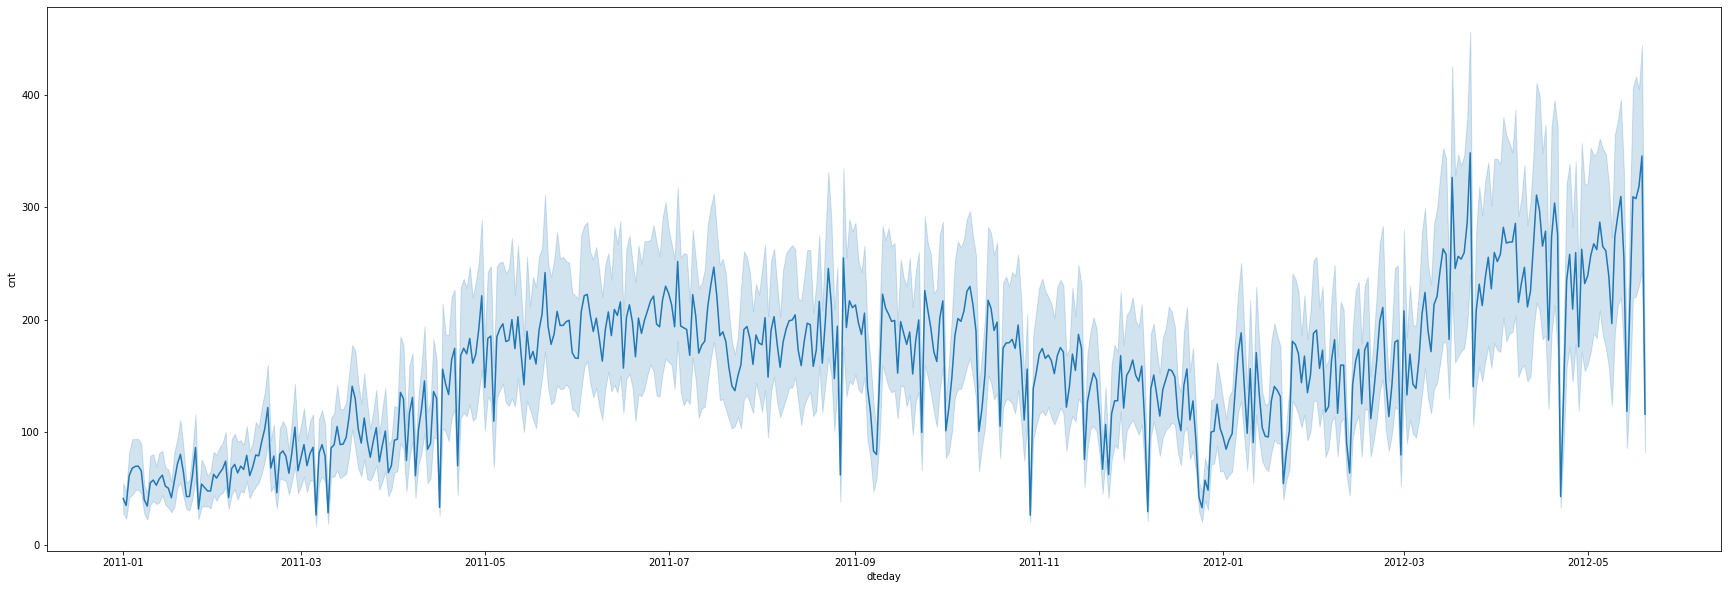

In [11]:
fig, ax = plt.subplots(figsize = (30, 10))
sns.lineplot(x= df_train['dteday'], y= df_train['cnt'])

Realizamos resample para visualizar mejor y reducir ruidos

In [12]:
df_train_resample_D = df_train.resample('D', on = 'dteday').mean()

In [13]:
df_train_resample_D.head()

instant  season   yr  mnth         hr  holiday  weekday  \
dteday                                                                
2011-01-01     12.5     1.0  0.0   1.0  11.500000      0.0      6.0   
2011-01-02     36.0     1.0  0.0   1.0  11.782609      0.0      0.0   
2011-01-03     58.5     1.0  0.0   1.0  12.318182      0.0      1.0   
2011-01-04     81.0     1.0  0.0   1.0  11.869565      0.0      2.0   
2011-01-05    104.0     1.0  0.0   1.0  11.869565      0.0      3.0   

            workingday  weathersit      temp     atemp       hum  windspeed  \
dteday                                                                        
2011-01-01         0.0    1.583333  0.344167  0.363625  0.805833   0.160446   
2011-01-02         0.0    1.956522  0.363478  0.353739  0.696087   0.248539   
2011-01-03         1.0    1.000000  0.196364  0.189405  0.437273   0.248309   
2011-01-04         1.0    1.043478  0.200000  0.212122  0.590435   0.160296   
2011-01-05         1.0    1.000000  0.226957  0.229270  0.436957   0.186900   

               casual  registered        cnt  
dteday                                        
2011-01-01  13.791667   27.250000  41.041667  
2011-01-02   5.695652   29.130435  34.826087  
2011-01-03   5.454545   55.863636  61.318182  
2011-01-04   4.695652   63.217391  67.913043  
2011-01-05   3.565217   66.000000  69.565217

<AxesSubplot:xlabel='dteday', ylabel='cnt'>

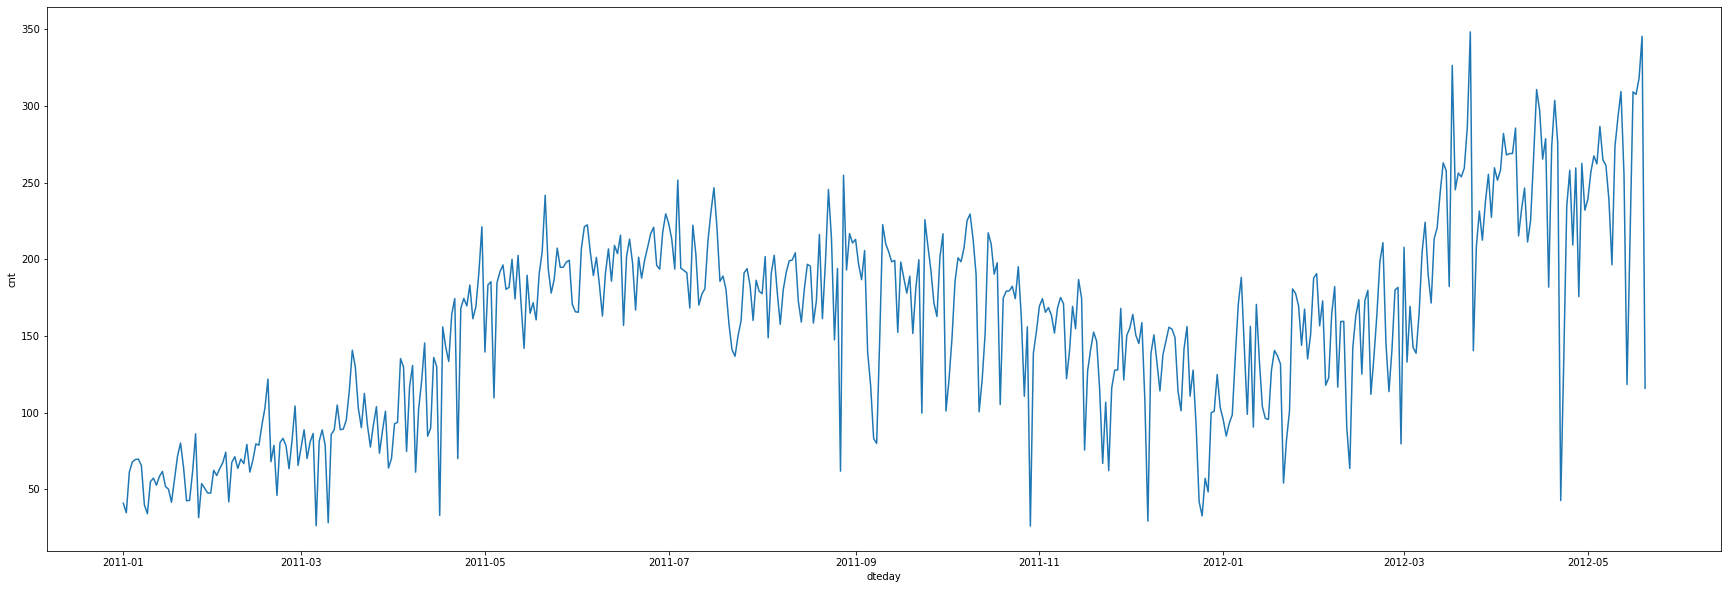

In [14]:
fig, ax = plt.subplots(figsize = (30, 10))
sns.lineplot(x= df_train_resample_D.index, y= df_train_resample_D['cnt'])

Resample semanal

In [15]:
df_train_resample_W = df_train.resample('W', on = 'dteday').mean()

In [16]:
df_train_resample_W.head()

instant  season   yr  mnth         hr   holiday   weekday  \
dteday                                                                  
2011-01-02     24.0     1.0  0.0   1.0  11.638298  0.000000  3.063830   
2011-01-09    128.5     1.0  0.0   1.0  11.820988  0.000000  3.012346   
2011-01-16    291.0     1.0  0.0   1.0  11.742331  0.000000  3.000000   
2011-01-23    449.0     1.0  0.0   1.0  12.117647  0.156863  3.078431   
2011-01-30    595.0     1.0  0.0   1.0  11.956835  0.000000  2.892086   

            workingday  weathersit      temp     atemp       hum  windspeed  \
dteday                                                                        
2011-01-02    0.000000    1.765957  0.353617  0.358787  0.752128   0.203555   
2011-01-09    0.703704    1.259259  0.189136  0.192397  0.493333   0.212834   
2011-01-16    0.705521    1.349693  0.183804  0.189537  0.534479   0.203652   
2011-01-23    0.542484    1.555556  0.180784  0.182322  0.545294   0.222324   
2011-01-30    0.669065    1.625899  0.191367  0.207873  0.680863   0.144749   

              casual  registered        cnt  
dteday                                       
2011-01-02  9.829787   28.170213  38.000000  
2011-01-09  4.123457   53.950617  58.074074  
2011-01-16  4.134969   51.233129  55.368098  
2011-01-23  3.954248   53.366013  57.320261  
2011-01-30  4.474820   50.913669  55.388489

<AxesSubplot:xlabel='dteday', ylabel='cnt'>

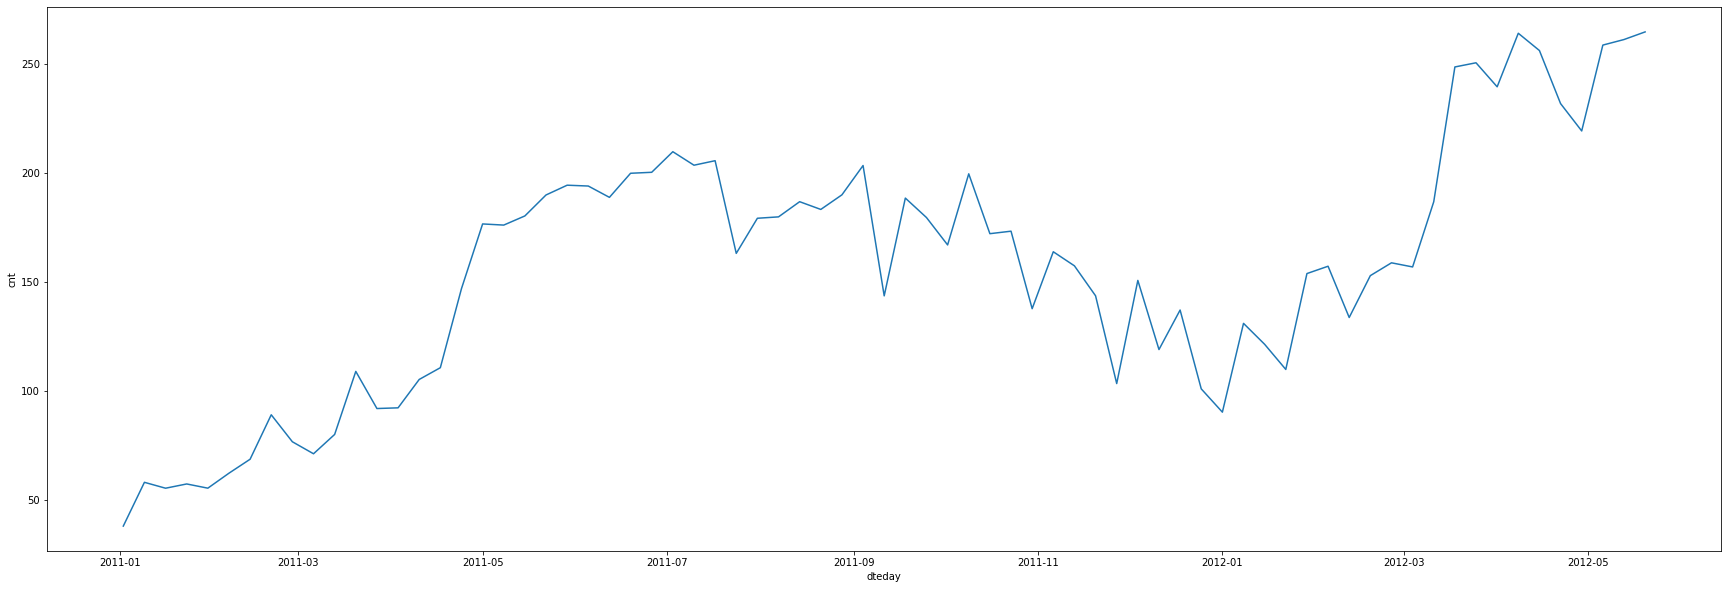

In [17]:
fig, ax = plt.subplots(figsize = (30, 10))
sns.lineplot(x= df_train_resample_W.index, y= df_train_resample_W['cnt'])

Se observa una alta mejora en la reducción de ruido. Deberemos ver cuanto afecta a la precisión de la predicción

#### Componentes de la serie de tiempo

- Media Móvil

Trabajaremos con todas las muestras

In [18]:
# cantidad de muestras
df_train_copia = df_train.copy()
len(df_train_copia)

11999

In [19]:
ventana_media_movil = (660)

In [20]:
semanal_promedio_tendencia = df_train_copia.cnt.rolling(window=ventana_media_movil, center = True).mean()
semanal_promedio_tendencia

0       NaN
1       NaN
2       NaN
3       NaN
4       NaN
         ..
11994   NaN
11995   NaN
11996   NaN
11997   NaN
11998   NaN
Name: cnt, Length: 11999, dtype: float64

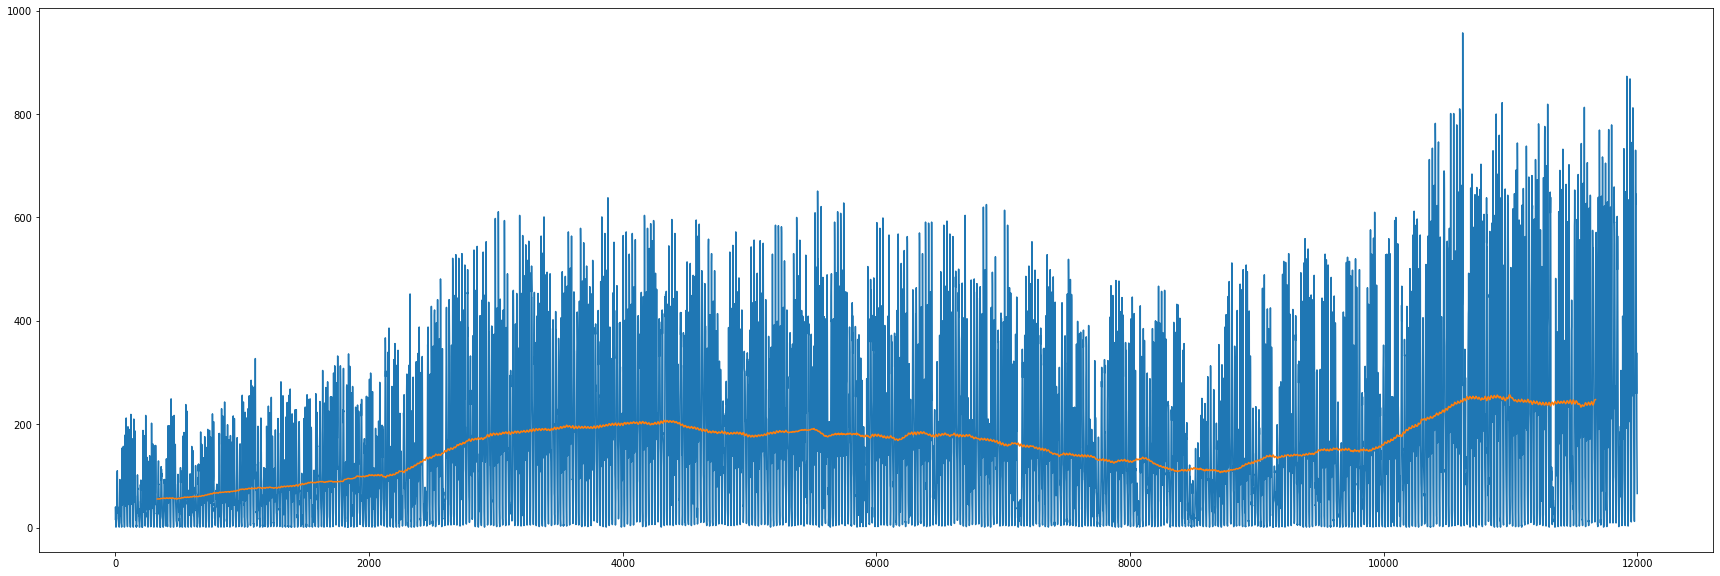

In [21]:
fig, ax = plt.subplots(figsize = (30, 10))
plt.plot(df_train_copia.index, df_train_copia.cnt)
plt.plot(semanal_promedio_tendencia)

- Estacionalidad

In [22]:
df_train_index = df_train_copia.set_index('dteday')

Text(0, 0.5, 'Rentas')

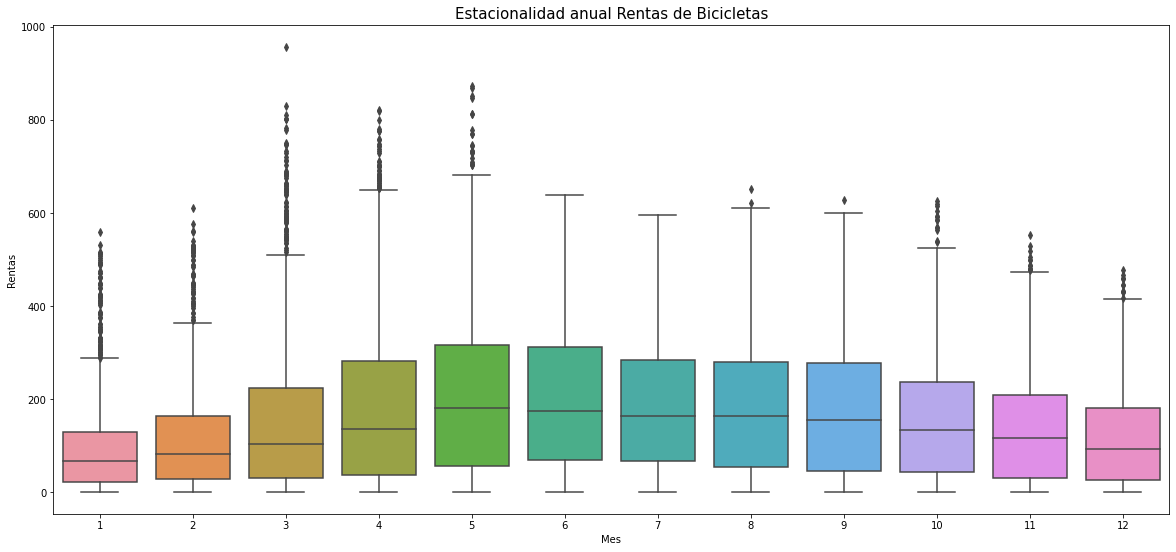

In [23]:
plt.figure(figsize = (20,9))
sns.boxplot(data=df_train_index,x=df_train_index.index.month,y= df_train_index.cnt)
plt.title('Estacionalidad anual Rentas de Bicicletas', fontsize = 15)
plt.xlabel('Mes')
plt.ylabel('Rentas')

- Otros analisis

In [24]:
# Correlación
df_corr = df_train_copia[['season', 'holiday', 'weekday', 'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered', 'cnt']].corr()

In [25]:
df_corr

season   holiday   weekday  workingday  weathersit      temp  \
season      1.000000 -0.008928 -0.003688    0.012630   -0.009029  0.410790   
holiday    -0.008928  1.000000 -0.102503   -0.248601   -0.014707 -0.028519   
weekday    -0.003688 -0.102503  1.000000    0.031057    0.017259 -0.010002   
workingday  0.012630 -0.248601  0.031057    1.000000    0.042202  0.062273   
weathersit -0.009029 -0.014707  0.017259    0.042202    1.000000 -0.080149   
temp        0.410790 -0.028519 -0.010002    0.062273   -0.080149  1.000000   
atemp       0.413196 -0.038005 -0.009841    0.066305   -0.081386  0.991785   
hum         0.198937 -0.036672 -0.025932    0.022805    0.430378 -0.019289   
windspeed  -0.142924  0.022681  0.008447   -0.002493    0.009195 -0.013984   
casual      0.119043  0.022140  0.023687   -0.298241   -0.147903  0.450777   
registered  0.093595 -0.044534  0.019179    0.134789   -0.130223  0.322875   
cnt         0.111369 -0.030304  0.022618    0.025132   -0.149848  0.395743   

               atemp       hum  windspeed    casual  registered       cnt  
season      0.413196  0.198937  -0.142924  0.119043    0.093595  0.111369  
holiday    -0.038005 -0.036672   0.022681  0.022140   -0.044534 -0.030304  
weekday    -0.009841 -0.025932   0.008447  0.023687    0.019179  0.022618  
workingday  0.066305  0.022805  -0.002493 -0.298241    0.134789  0.025132  
weathersit -0.081386  0.430378   0.009195 -0.147903   -0.130223 -0.149848  
temp        0.991785 -0.019289  -0.013984  0.450777    0.322875  0.395743  
atemp       1.000000 -0.003669  -0.057619  0.447899    0.323264  0.395234  
hum        -0.003669  1.000000  -0.295765 -0.298354   -0.264382 -0.303672  
windspeed  -0.057619 -0.295765   1.000000  0.067061    0.091642  0.094791  
casual      0.447899 -0.298354   0.067061  1.000000    0.503185  0.702414  
registered  0.323264 -0.264382   0.091642  0.503185    1.000000  0.968540  
cnt         0.395234 -0.303672   0.094791  0.702414    0.968540  1.000000

Text(0.5, 1.0, 'Dia Laboral')

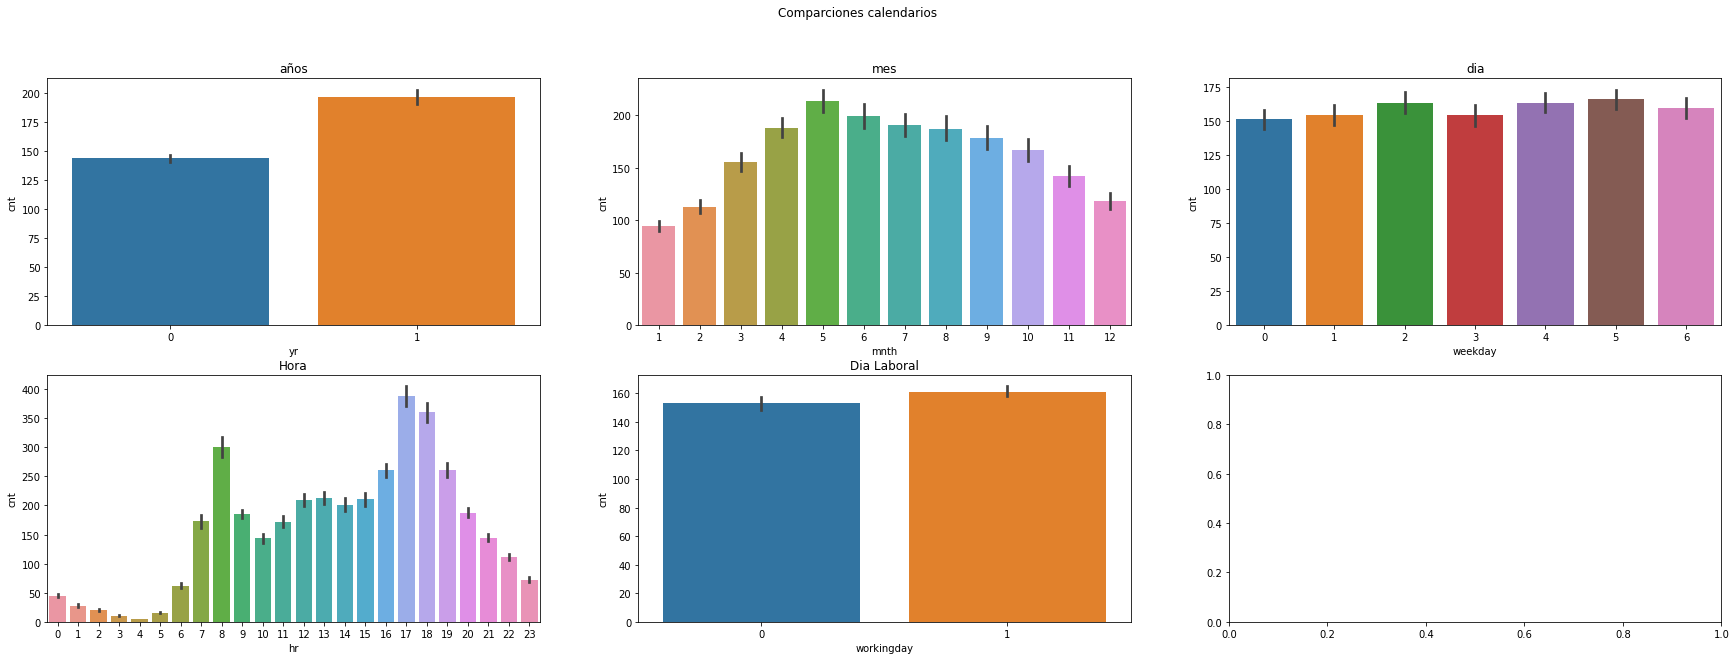

In [26]:
fig, axes = plt.subplots(2, 3, figsize=(30, 10), sharey=False)
fig.suptitle('Comparciones calendarios')

# Año
sns.barplot(ax=axes[0,0], x=df_train_copia['yr'], y=df_train_copia['cnt'])
axes[0,0].set_title('años')

# Mes
sns.barplot(ax=axes[0,1], x=df_train_copia['mnth'], y=df_train_copia['cnt'])
axes[0,1].set_title('mes')

# Dia
sns.barplot(ax=axes[0,2], x=df_train_copia['weekday'], y=df_train_copia['cnt'])
axes[0,2].set_title('dia')

# Hora 
sns.barplot(ax=axes[1,0], x=df_train_copia['hr'], y=df_train_copia['cnt'])
axes[1,0].set_title('Hora')

# Hora 
sns.barplot(ax=axes[1,1], x=df_train_copia['workingday'], y=df_train_copia['cnt'])
axes[1,1].set_title('Dia Laboral')


Text(0.5, 1.0, 'Velocidad viento')

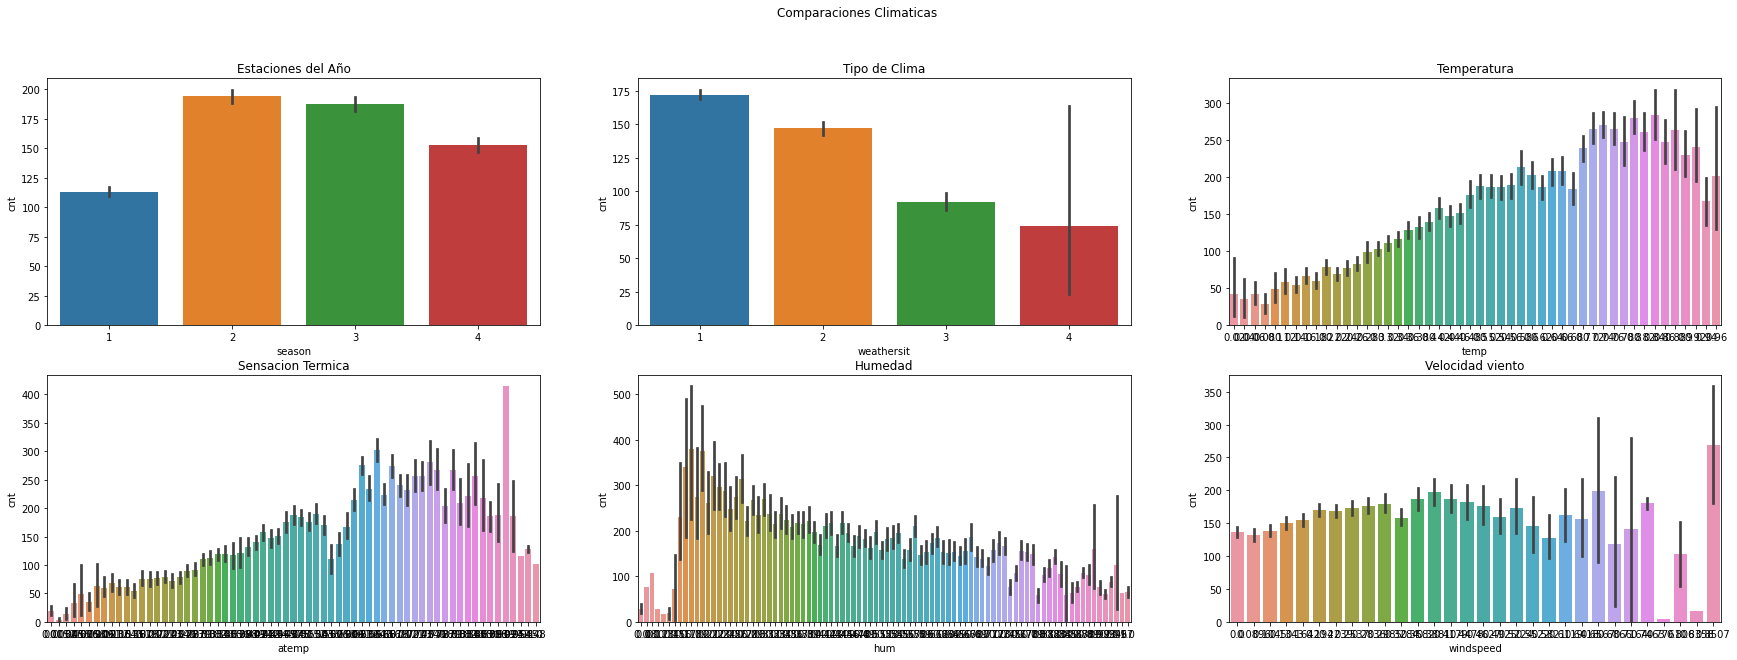

In [27]:
fig, axes = plt.subplots(2, 3, figsize=(30, 10), sharey=False)
fig.suptitle('Comparaciones Climaticas')

# Estacion del año
sns.barplot(ax=axes[0,0], x=df_train_copia['season'], y=df_train_copia['cnt'])
axes[0,0].set_title('Estaciones del Año')

# Tipo de clima
sns.barplot(ax=axes[0,1], x=df_train_copia['weathersit'], y=df_train_copia['cnt'])
axes[0,1].set_title('Tipo de Clima')

# Temperatura
sns.barplot(ax=axes[0,2], x=df_train_copia['temp'], y=df_train_copia['cnt'])
axes[0,2].set_title('Temperatura')

# Sensacion Termica
sns.barplot(ax=axes[1,0], x=df_train_copia['atemp'], y=df_train_copia['cnt'])
axes[1,0].set_title('Sensacion Termica')

# Humedad
sns.barplot(ax=axes[1,1], x=df_train_copia['hum'], y=df_train_copia['cnt'])
axes[1,1].set_title('Humedad')

# Velocidad viento
sns.barplot(ax=axes[1,2], x=df_train_copia['windspeed'], y=df_train_copia['cnt'])
axes[1,2].set_title('Velocidad viento')


## Modelo Predictivo (Series temporales)
### Forecasting con Prophet


Primera etapa. Ejecutamos el modelo solo con columna fecha y renta(cnt)

In [28]:
df_train_copia.head()

instant     dteday  season  yr  mnth  hr  holiday  weekday  workingday  \
0        1 2011-01-01       1   0     1   0        0        6           0   
1        2 2011-01-01       1   0     1   1        0        6           0   
2        3 2011-01-01       1   0     1   2        0        6           0   
3        4 2011-01-01       1   0     1   3        0        6           0   
4        5 2011-01-01       1   0     1   4        0        6           0   

   weathersit  temp   atemp   hum  windspeed  casual  registered  cnt  
0           1  0.24  0.2879  0.81        0.0       3          13   16  
1           1  0.22  0.2727  0.80        0.0       8          32   40  
2           1  0.22  0.2727  0.80        0.0       5          27   32  
3           1  0.24  0.2879  0.75        0.0       3          10   13  
4           1  0.24  0.2879  0.75        0.0       0           1    1

In [29]:
df = df_train_copia[['dteday', 'cnt']]
df = df.rename(columns= {'dteday' : 'ds', 'cnt' : 'y'})
df.head()


ds   y
0 2011-01-01  16
1 2011-01-01  40
2 2011-01-01  32
3 2011-01-01  13
4 2011-01-01   1

In [30]:
from prophet import Prophet

In [31]:
modelo = Prophet()
modelo.fit(df)

13:04:05 - cmdstanpy - INFO - Chain [1] start processing
13:04:07 - cmdstanpy - INFO - Chain [1] done processing


Determinamos datos test

In [32]:
df_test_copia = df_test[['dteday']]
df_test_copia = df_test_copia.rename(columns= {'dteday' : 'ds'})

df_test_copia.head()

ds
0 2012-05-20
1 2012-05-20
2 2012-05-20
3 2012-05-20
4 2012-05-20

In [33]:
future = modelo.make_future_dataframe(periods=len(df_test_copia), freq= 'H')

In [34]:
future

ds
0    2011-01-01 00:00:00
1    2011-01-02 00:00:00
2    2011-01-03 00:00:00
3    2011-01-04 00:00:00
4    2011-01-05 00:00:00
...                  ...
5881 2012-12-30 00:00:00
5882 2012-12-30 01:00:00
5883 2012-12-30 02:00:00
5884 2012-12-30 03:00:00
5885 2012-12-30 04:00:00

[5886 rows x 1 columns]

In [35]:
forecast = modelo.predict(future)
forecast.head()

ds      trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
0 2011-01-01  39.293941 -140.668937  221.774282    39.293941    39.293941   
1 2011-01-02  40.074651 -144.439125  220.932472    40.074651    40.074651   
2 2011-01-03  40.855360 -137.504295  226.833886    40.855360    40.855360   
3 2011-01-04  41.636069 -136.007497  213.719844    41.636069    41.636069   
4 2011-01-05  42.416778 -140.291511  223.276872    42.416778    42.416778   

   additive_terms  additive_terms_lower  additive_terms_upper    weekly  \
0        1.195133              1.195133              1.195133  1.195133   
1       -6.333188             -6.333188             -6.333188 -6.333188   
2       -3.457319             -3.457319             -3.457319 -3.457319   
3        3.974168              3.974168              3.974168  3.974168   
4       -5.023855             -5.023855             -5.023855 -5.023855   

   weekly_lower  weekly_upper  multiplicative_terms  \
0      1.195133      1.195133                   0.0   
1     -6.333188     -6.333188                   0.0   
2     -3.457319     -3.457319                   0.0   
3      3.974168      3.974168                   0.0   
4     -5.023855     -5.023855                   0.0   

   multiplicative_terms_lower  multiplicative_terms_upper       yhat  
0                         0.0                         0.0  40.489074  
1                         0.0                         0.0  33.741463  
2                         0.0                         0.0  37.398041  
3                         0.0                         0.0  45.610237  
4                         0.0                         0.0  37.392923

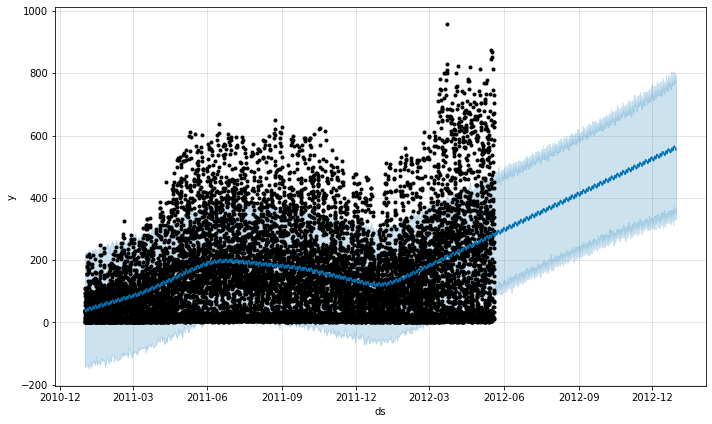

In [36]:
fig1 = modelo.plot(forecast)

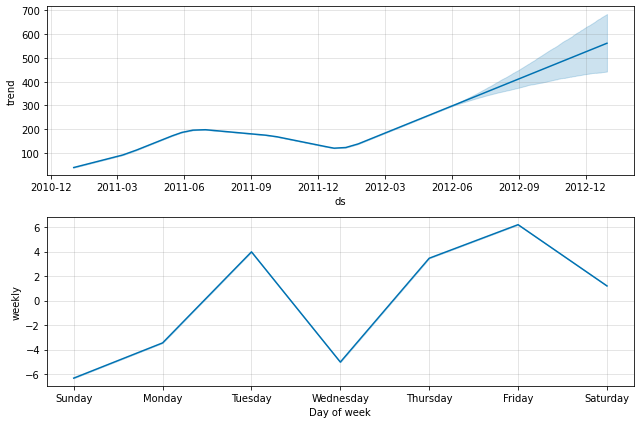

In [37]:
fig2 = modelo.plot_components(forecast)

### Evaluamos el Modelo de una variable

In [38]:
from prophet.diagnostics import cross_validation
from prophet.diagnostics import performance_metrics
from prophet.plot import plot_cross_validation_metric
from prophet.plot import plot_plotly, plot_forecast_component_plotly

In [39]:
df_cv = cross_validation(modelo, horizon = '30 days')

  0%|          | 0/26 [00:00<?, ?it/s]

13:04:11 - cmdstanpy - INFO - Chain [1] start processing
13:04:12 - cmdstanpy - INFO - Chain [1] done processing
13:04:12 - cmdstanpy - INFO - Chain [1] start processing
13:04:12 - cmdstanpy - INFO - Chain [1] done processing
13:04:13 - cmdstanpy - INFO - Chain [1] start processing
13:04:13 - cmdstanpy - INFO - Chain [1] done processing
13:04:14 - cmdstanpy - INFO - Chain [1] start processing
13:04:14 - cmdstanpy - INFO - Chain [1] done processing
13:04:15 - cmdstanpy - INFO - Chain [1] start processing
13:04:15 - cmdstanpy - INFO - Chain [1] done processing
13:04:15 - cmdstanpy - INFO - Chain [1] start processing
13:04:16 - cmdstanpy - INFO - Chain [1] done processing
13:04:16 - cmdstanpy - INFO - Chain [1] start processing
13:04:16 - cmdstanpy - INFO - Chain [1] done processing
13:04:17 - cmdstanpy - INFO - Chain [1] start processing
13:04:17 - cmdstanpy - INFO - Chain [1] done processing
13:04:18 - cmdstanpy - INFO - Chain [1] start processing
13:04:18 - cmdstanpy - INFO - Chain [1]

In [40]:
df_cv.head()

ds        yhat  yhat_lower  yhat_upper    y     cutoff
0 2011-04-12  110.313383   16.032833  198.623156   44 2011-04-11
1 2011-04-12  110.313383   26.476897  197.767532   39 2011-04-11
2 2011-04-12  110.313383   28.262254  193.498866   54 2011-04-11
3 2011-04-12  110.313383   24.666537  197.910339   84 2011-04-11
4 2011-04-12  110.313383   18.008428  205.512922  103 2011-04-11

In [41]:
df_perform = performance_metrics(df_cv)
df_perform.describe()

horizon           mse        rmse         mae  \
count                         28     28.000000   28.000000   28.000000   
mean            16 days 12:00:00  24568.602099  156.662051  123.367592   
std    8 days 05:25:24.250324976   1610.969125    5.152879    3.704574   
min              3 days 00:00:00  21181.693111  145.539318  115.937137   
25%              9 days 18:00:00  23600.340151  153.624013  121.231594   
50%             16 days 12:00:00  24421.068234  156.272381  122.728471   
75%             23 days 06:00:00  25921.370425  161.001130  126.780384   
max             30 days 00:00:00  27355.065863  165.393669  129.334511   

            mape      mdape      smape   coverage  
count  28.000000  28.000000  28.000000  28.000000  
mean    6.317040   0.573899   0.801802   0.677728  
std     0.201603   0.016105   0.011370   0.016371  
min     5.970705   0.544521   0.782061   0.648417  
25%     6.178576   0.562581   0.794420   0.666892  
50%     6.311836   0.576377   0.799681   0.676183  
75%     6.461594   0.584827   0.807775   0.686558  
max     6.795274   0.601468   0.826006   0.713617

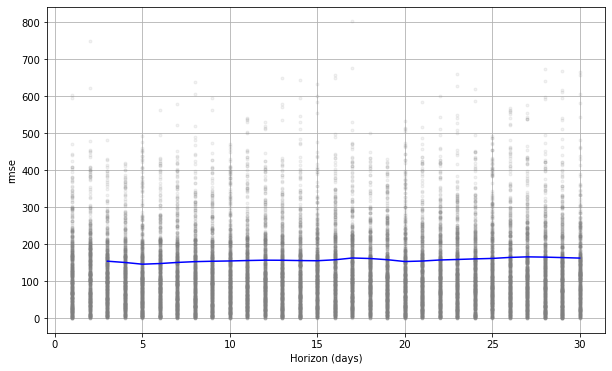

In [42]:
fig = plot_cross_validation_metric(df_cv, metric='rmse')

In [43]:
print('El RMSE es:', df_perform.rmse.mean())

El RMSE es: 156.66205100618316


In [44]:
df_p = performance_metrics(df_cv, rolling_window = 1)

In [45]:
df_p

horizon           mse        rmse         mae      mape     mdape     smape  \
0 30 days  24618.607594  156.903179  123.508249  6.310233  0.575341  0.802859   

   coverage  
0  0.676628

### Corremos modelo con mas variables

Entrenamiento. Quitamos columnas que no vamos a utilizar

In [84]:
# Genero dataframe de entrenamiento y transformo columna fechas.
df_grupo = df_train[['dteday', 'hr', 'cnt', 'season', 'holiday', 'weekday', 'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed']]
#df_grupo = df_train_resample_W[['cnt', 'season', 'workingday', 'weathersit', 'temp', 'atemp', 'windspeed']]
df_grupo['fecha_or'] = df_grupo['dteday'].dt.strftime('%Y-%m-%d')
df_grupo['hr_str'] = df_grupo['hr'].astype('str') 
df_grupo['dteday'] = df_grupo['fecha_or'] + ' ' +df_grupo['hr_str']+':00:00'
df_grupo['dteday'] = pd.to_datetime(df_grupo['dteday'])
df_grupo.drop(columns= ['fecha_or','hr_str', 'hr'], inplace= True)
df_grupo = df_grupo.rename(columns= {'dteday' : 'ds', 'cnt' : 'y'})
df_grupo.head()

C:\Users\Mauricio\AppData\Local\Temp\ipykernel_27528\274140092.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Mauricio\AppData\Local\Temp\ipykernel_27528\274140092.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Mauricio\AppData\Local\Temp\ipykernel_27528\274140092.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org

ds   y  season  holiday  weekday  workingday  weathersit  \
0 2011-01-01 00:00:00  16       1        0        6           0           1   
1 2011-01-01 01:00:00  40       1        0        6           0           1   
2 2011-01-01 02:00:00  32       1        0        6           0           1   
3 2011-01-01 03:00:00  13       1        0        6           0           1   
4 2011-01-01 04:00:00   1       1        0        6           0           1   

   temp   atemp   hum  windspeed  
0  0.24  0.2879  0.81        0.0  
1  0.22  0.2727  0.80        0.0  
2  0.22  0.2727  0.80        0.0  
3  0.24  0.2879  0.75        0.0  
4  0.24  0.2879  0.75        0.0

In [85]:
from prophet import Prophet

In [86]:
#modelo2 = Prophet(yearly_seasonality= True, uncertainty_samples = 50, mcmc_samples=50, interval_width= 0.6)
modelo2 = Prophet(daily_seasonality= True, weekly_seasonality= True, changepoint_prior_scale= 0.1, seasonality_prior_scale= 0.2)
modelo2.add_regressor('season')
modelo2.add_regressor('holiday')
modelo2.add_regressor('weekday')
modelo2.add_regressor('weathersit')
modelo2.add_regressor('workingday')
modelo2.add_regressor('temp')
modelo2.add_regressor('atemp')
modelo2.add_regressor('hum')
modelo2.add_regressor('windspeed')
modelo2.fit(df_grupo)

14:28:07 - cmdstanpy - INFO - Chain [1] start processing
14:28:14 - cmdstanpy - INFO - Chain [1] done processing


Preparamos dataframe para prediccion y reralizamos prediccion

Prediccón con datos reales y datos nuevos

In [87]:
df_test_grupo = df_test[['dteday', 'season', 'holiday', 'weekday', 'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed']].copy()
df_test_grupo = df_test_grupo.rename(columns= {'dteday' : 'ds'})

In [88]:
df_grupo = df_grupo.set_index('ds')
df_test_grupo = df_test_grupo.set_index('ds')

In [51]:
# Funciones para completar datos futuros
def estacion(ds):
    date = (pd.to_datetime(ds)).date()
    
    if df_grupo[date:].empty:
            return df_test_grupo[date:]['season'].values[0]
    else:
            return (df_grupo[date:]['season']).values[0]
    
    return 0

def clima(ds):
    date = (pd.to_datetime(ds)).date()
    
    if df_grupo[date:].empty:
        return df_test_grupo[date:]['weathersit'].values[0]
    else:
        return (df_grupo[date:]['weathersit']).values[0]
    
    return 0

def temp(ds):
    date = (pd.to_datetime(ds)).date()
    
    if df_grupo[date:].empty:
        return df_test_grupo[date:]['temp'].values[0]
    else:
        return (df_grupo[date:]['temp']).values[0]
    
    return 0

def sen_tem(ds):
    date = (pd.to_datetime(ds)).date()
    
    if df_grupo[date:].empty:
        return df_test_grupo[date:]['atemp'].values[0]
    else:
        return (df_grupo[date:]['atemp']).values[0]
    
    return 0

def vacaciones(ds):
    date = (pd.to_datetime(ds)).date()
    
    if df_grupo[date:].empty:
        return df_test_grupo[date:]['holiday'].values[0]
    else:
        return (df_grupo[date:]['holiday']).values[0]
    
    return 0

def dia_semana(ds):
    date = (pd.to_datetime(ds)).date()
    
    if df_grupo[date:].empty:
        return df_test_grupo[date:]['weekday'].values[0]
    else:
        return (df_grupo[date:]['weekday']).values[0]
    
    return 0

def feriado(ds):
    date = (pd.to_datetime(ds)).date()
    
    if df_grupo[date:].empty:
        return df_test_grupo[date:]['workingday'].values[0]
    else:
        return (df_grupo[date:]['workingday']).values[0]
    
    return 0

def humedad(ds):
    date = (pd.to_datetime(ds)).date()
    
    if df_grupo[date:].empty:
        return df_test_grupo[date:]['hum'].values[0]
    else:
        return (df_grupo[date:]['hum']).values[0]
    
    return 0

def viento(ds):
    date = (pd.to_datetime(ds)).date()
    
    if df_grupo[date:].empty:
        return df_test_grupo[date:]['windspeed'].values[0]
    else:
        return (df_grupo[date:]['windspeed']).values[0]
    
    return 0



In [89]:
# Creacion de Dataframe a predecir
future_grupo = modelo2.make_future_dataframe(periods= len(df_test_grupo), freq= 'H')

In [90]:
# Agregamos y completamos columnas
future_grupo['season'] = future_grupo['ds'].apply(estacion)
future_grupo['holiday'] = future_grupo['ds'].apply(vacaciones)
future_grupo['weekday'] = future_grupo['ds'].apply(dia_semana)
future_grupo['workingday'] = future_grupo['ds'].apply(feriado)
future_grupo['weathersit'] = future_grupo['ds'].apply(clima)
future_grupo['temp'] = future_grupo['ds'].apply(temp)
future_grupo['atemp'] = future_grupo['ds'].apply(sen_tem)
future_grupo['hum'] = future_grupo['ds'].apply(humedad)
future_grupo['windspeed'] = future_grupo['ds'].apply(viento)

In [91]:
future_grupo

ds  season  holiday  weekday  workingday  weathersit  \
0     2011-01-01 00:00:00       1        0        6           0           1   
1     2011-01-01 01:00:00       1        0        6           0           1   
2     2011-01-01 02:00:00       1        0        6           0           1   
3     2011-01-01 03:00:00       1        0        6           0           1   
4     2011-01-01 04:00:00       1        0        6           0           1   
...                   ...     ...      ...      ...         ...         ...   
17374 2012-12-30 03:00:00       1        0        0           0           2   
17375 2012-12-30 04:00:00       1        0        0           0           2   
17376 2012-12-30 05:00:00       1        0        0           0           2   
17377 2012-12-30 06:00:00       1        0        0           0           2   
17378 2012-12-30 07:00:00       1        0        0           0           2   

       temp   atemp   hum  windspeed  
0      0.24  0.2879  0.81     0.0000  
1      0.24  0.2879  0.81     0.0000  
2      0.24  0.2879  0.81     0.0000  
3      0.24  0.2879  0.81     0.0000  
4      0.24  0.2879  0.81     0.0000  
...     ...     ...   ...        ...  
17374  0.26  0.2576  0.60     0.1642  
17375  0.26  0.2576  0.60     0.1642  
17376  0.26  0.2576  0.60     0.1642  
17377  0.26  0.2576  0.60     0.1642  
17378  0.26  0.2576  0.60     0.1642  

[17379 rows x 10 columns]

In [92]:
forecast2 = modelo2.predict(future_grupo)

In [93]:
plot_plotly(modelo2,forecast2)

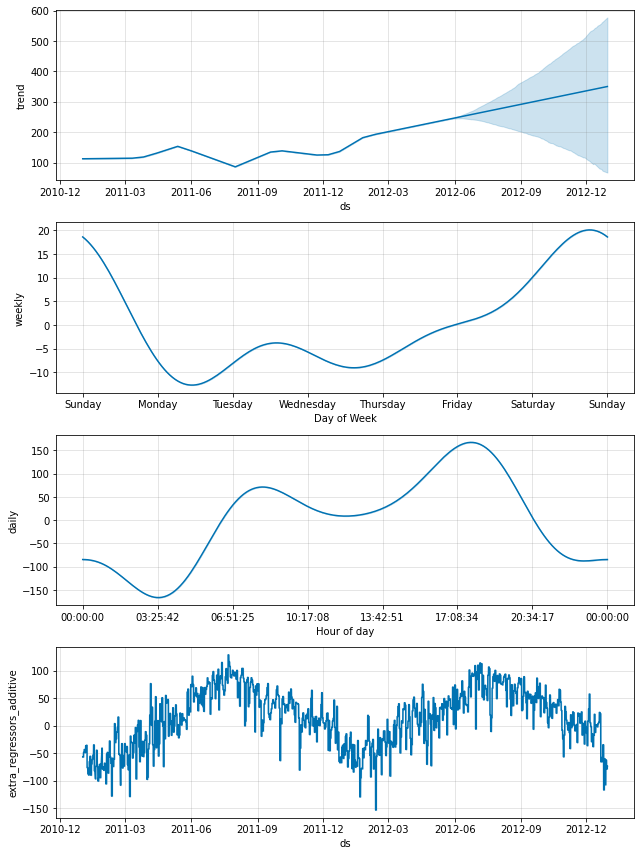

In [94]:
fig3 = modelo2.plot_components(forecast2)

Predicción solo datos nuevos.

In [95]:
df_test_hora = df_test[['dteday', 'hr', 'season', 'holiday', 'weekday', 'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed']].copy()
df_test_hora['fecha_or'] = df_test_hora['dteday'].dt.strftime('%Y-%m-%d')
df_test_hora['hr_str'] = df_test_hora['hr'].astype('str') 
df_test_hora['dteday'] = df_test_hora['fecha_or'] + ' ' +df_test_hora['hr_str']+':00:00'
df_test_hora['dteday'] = pd.to_datetime(df_test_hora['dteday'])
df_test_hora.drop(columns= ['fecha_or','hr_str', 'hr'], inplace= True)
df_test_hora = df_test_hora.rename(columns= {'dteday' : 'ds'})

In [96]:
forecast3 = modelo2.predict(df_test_hora)

In [97]:
plot_plotly(modelo2,forecast3)

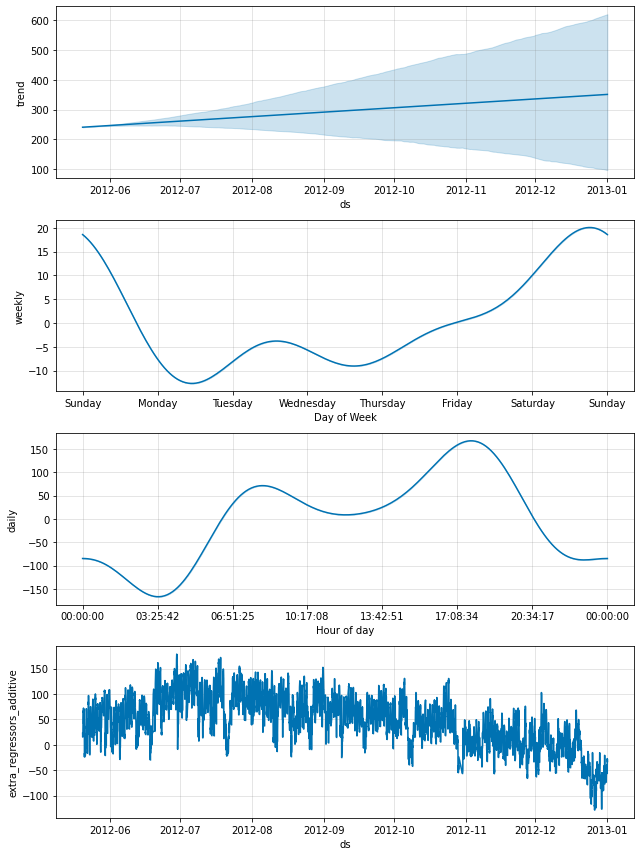

In [99]:
fig3 = modelo2.plot_components(forecast3)

Creamos archivo a exportar

In [100]:
df_export = pd.DataFrame(forecast3['yhat'])

df_export.rename(columns = {'yhat': 'pred'}, inplace= True)
df_export.to_csv('vilarmauricio.csv', index= False)

### Evaluamos el Modelo de varias variables

In [101]:
from prophet.diagnostics import cross_validation
from prophet.diagnostics import performance_metrics
from prophet.plot import plot_cross_validation_metric

In [102]:
df_cv = cross_validation(modelo2, horizon = '60 days', parallel="processes")

In [103]:
df_cv.head()

ds        yhat  yhat_lower  yhat_upper    y  \
0 2011-04-11 04:00:00   43.599909  -11.022963  102.132584    1   
1 2011-04-11 05:00:00   64.169403    6.429853  124.138627   13   
2 2011-04-11 06:00:00   85.495688   26.873917  144.271637   61   
3 2011-04-11 07:00:00  132.568428   72.836915  188.671134  176   
4 2011-04-11 08:00:00  154.742896   98.354424  209.434640  314   

               cutoff  
0 2011-04-11 03:00:00  
1 2011-04-11 03:00:00  
2 2011-04-11 03:00:00  
3 2011-04-11 03:00:00  
4 2011-04-11 03:00:00

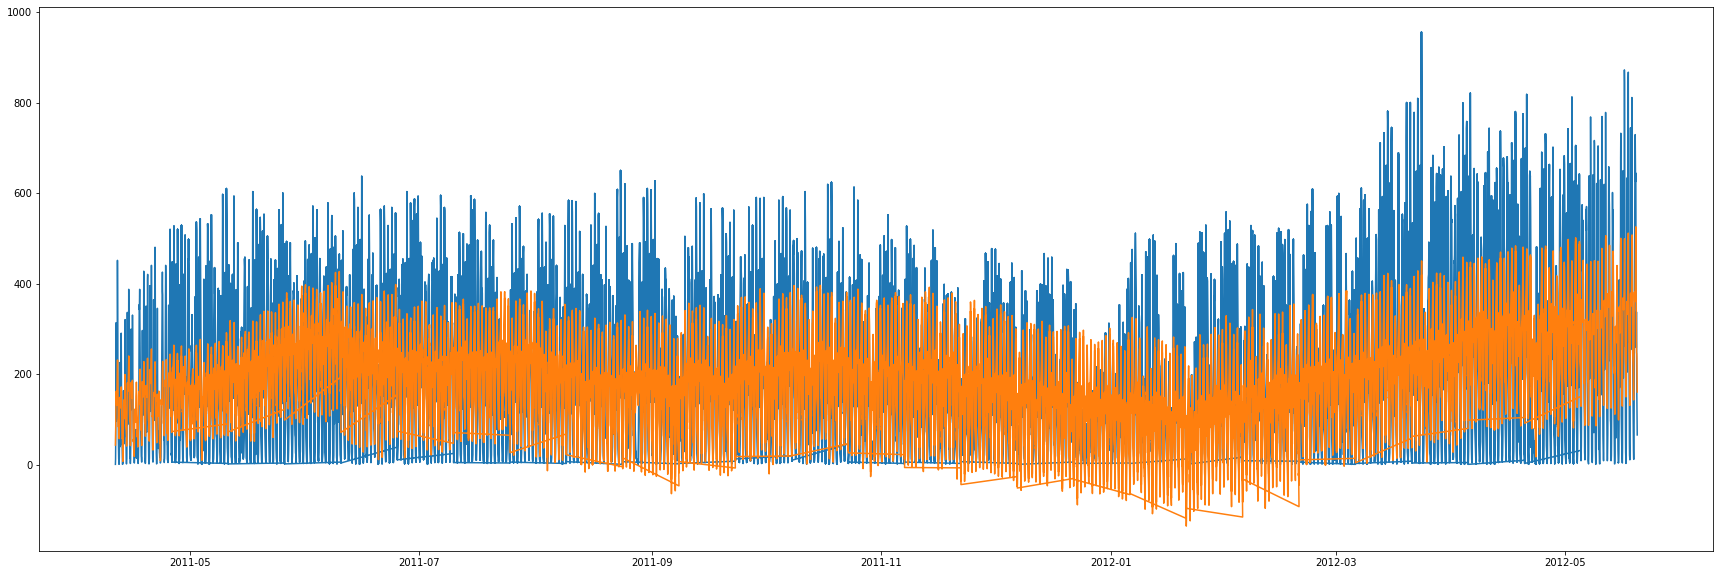

In [104]:
fig, ax = plt.subplots(figsize = (30, 10))
plt.plot(df_cv['ds'], df_cv.y)
plt.plot(df_cv['ds'], df_cv.yhat)


In [105]:
df_perform = performance_metrics(df_cv)
df_perform.describe()

horizon           mse        rmse         mae  \
count                        649    649.000000  649.000000  649.000000   
mean            16 days 12:00:00  10824.794256  103.965668   78.165038   
std    7 days 19:29:39.999703695    830.051096    3.994836    3.382959   
min              3 days 00:00:00   9261.191651   96.235085   72.223990   
25%              9 days 18:00:00  10207.400762  101.031682   75.717016   
50%             16 days 12:00:00  10750.956011  103.686817   77.912679   
75%             23 days 06:00:00  11503.360841  107.253722   81.209153   
max             30 days 00:00:00  12365.131670  111.198614   83.952224   

             mape       mdape       smape    coverage  
count  649.000000  649.000000  649.000000  649.000000  
mean     2.467240    0.429307    0.635413    0.695956  
std      0.221207    0.014644    0.019217    0.019322  
min      1.932492    0.402113    0.594914    0.662652  
25%      2.364800    0.417123    0.618745    0.679728  
50%      2.455688    0.429860    0.638604    0.692122  
75%      2.609566    0.436730    0.647638    0.712064  
max      2.994023    0.469237    0.679812    0.733471

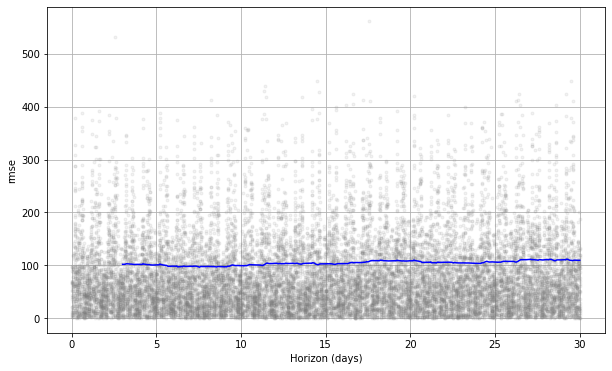

In [106]:
fig = plot_cross_validation_metric(df_cv, metric='rmse')

In [107]:
print('El RMSE es:', df_perform.rmse.mean())

El RMSE es: 103.96566802916463


In [108]:
df_p = performance_metrics(df_cv, rolling_window = 1)

In [109]:
df_p

horizon           mse        rmse        mae     mape     mdape   smape  \
0 30 days  10841.720522  104.123583  78.214578  2.47039  0.429576  0.6366   

   coverage  
0  0.696002

#### Ajustes de hiperparametros

In [80]:
df_grupo.reset_index(inplace= True)

In [81]:
# Python
import itertools
import numpy as np
import pandas as pd

# Parametros a variar
param_grid = {  
    'changepoint_prior_scale': [0.01, 0.05, 0.1, 0.15],
    'seasonality_prior_scale': [0.05, 0.1, 0.15, 0.2],
}

# Generacion de combinacion de todos los parametros
all_params = [dict(zip(param_grid.keys(), v)) for v in itertools.product(*param_grid.values())]
rmses = []  # Store the RMSEs for each params here

# Uso de cross validation para evaluar todos los parametros
for params in all_params:
    m = Prophet(**params)  
    m.add_regressor('season')
    m.add_regressor('holiday')
    m.add_regressor('weekday')
    m.add_regressor('weathersit')
    m.add_regressor('workingday')
    m.add_regressor('temp')
    m.add_regressor('atemp')
    m.add_regressor('hum')
    m.add_regressor('windspeed')
    m.fit(df_grupo)
    df_cv = cross_validation(m, horizon='60 days', parallel="processes")
    df_p = performance_metrics(df_cv, rolling_window=1)
    rmses.append(df_p['rmse'].values[0])

# Buscamos mejores parametros de rmse
tuning_results = pd.DataFrame(all_params)
tuning_results['rmse'] = rmses
print(tuning_results)


14:15:44 - cmdstanpy - INFO - Chain [1] start processing
14:15:50 - cmdstanpy - INFO - Chain [1] done processing
14:16:16 - cmdstanpy - INFO - Chain [1] start processing
14:16:22 - cmdstanpy - INFO - Chain [1] done processing
14:16:49 - cmdstanpy - INFO - Chain [1] start processing
14:16:52 - cmdstanpy - INFO - Chain [1] done processing
14:17:21 - cmdstanpy - INFO - Chain [1] start processing
14:17:27 - cmdstanpy - INFO - Chain [1] done processing
14:17:56 - cmdstanpy - INFO - Chain [1] start processing
14:18:01 - cmdstanpy - INFO - Chain [1] done processing
14:18:32 - cmdstanpy - INFO - Chain [1] start processing
14:18:38 - cmdstanpy - INFO - Chain [1] done processing
14:19:08 - cmdstanpy - INFO - Chain [1] start processing
14:19:14 - cmdstanpy - INFO - Chain [1] done processing
14:19:43 - cmdstanpy - INFO - Chain [1] start processing
14:19:49 - cmdstanpy - INFO - Chain [1] done processing
14:20:23 - cmdstanpy - INFO - Chain [1] start processing
14:20:30 - cmdstanpy - INFO - Chain [1]

    changepoint_prior_scale  seasonality_prior_scale        rmse
0                      0.05                      0.1  106.489591
1                      0.05                      0.2  106.540072
2                      0.05                      0.3  106.542868
3                      0.05                      0.4  106.557623
4                      0.08                      0.1  107.296290
5                      0.08                      0.2  107.275121
6                      0.08                      0.3  107.298296
7                      0.08                      0.4  107.251423
8                      0.10                      0.1  107.577933
9                      0.10                      0.2  107.386055
10                     0.10                      0.3  107.511377
11                     0.10                      0.4  107.499108
12                     0.15                      0.1  107.501385
13                     0.15                      0.2  107.448015
14                     0.

In [82]:
# Python
best_params = all_params[np.argmin(rmses)]
print(best_params)

{'changepoint_prior_scale': 0.05, 'seasonality_prior_scale': 0.1}
